Hola **Clara**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

### Introducción

En el entorno competitivo de las tiendas en línea, la toma de decisiones basada en datos es esencial para mejorar la experiencia del usuario y aumentar las conversiones. Este proyecto se centra en un análisis exhaustivo de datos recopilados de una tienda en línea durante un período específico, con el objetivo de evaluar la efectividad de diferentes estrategias de marketing mediante una prueba A/B.

El análisis se lleva a cabo en varias etapas, comenzando con la Exploración de Datos (EDA), que incluye la limpieza y preparación de los datos, identificación de patrones y tendencias, y la corrección de cualquier peculiaridad que pueda afectar la validez del análisis. Posteriormente, se realiza una prueba A/B para comparar dos variantes de estrategias de marketing implementadas en grupos de usuarios distintos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente esta introducción! Siempre procura incluir esto para que tu proyectos para que sea más claro el que y cómo de tu proyecto

In [28]:
# Importación de librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# Lectura de los datasets
ab_project_marketing_events= pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 14/ab_project_marketing_events_us.csv")

final_ab_new_users_upd= pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 14/final_ab_new_users_upd_us.csv")

final_ab_events_upd= pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 14/final_ab_events_upd_us.csv")

final_ab_participants_upd= pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 14/final_ab_participants_upd_us.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo con la carga de tus datos e importación de librerías

In [3]:
# Estudiar tipo de datos del dataset

#Lista de DataFrames 
dataframes = [ab_project_marketing_events, final_ab_new_users_upd, final_ab_events_upd, final_ab_participants_upd] 

# Ciclo for para imprimir la información de cada DataFrame 
for df in dataframes: 
    df.info() 
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null 

En el análisis de los datasets, se observa que casi todas las columnas tienen el tipo de dato object, lo cual no es conveniente para trabajar con los datos. Por lo tanto, más adelante se realizarán las conversiones necesarias. Además, se puede observar que los nombres de las columnas están en formato snake case y en minúsculas. Asimismo, se observa que los nombres son descriptivos de acuerdo a la información que contienen.

In [4]:
# Mostrar muetras de información de cada dataset

#Lista de DataFrames 
dataframes = [ab_project_marketing_events, final_ab_new_users_upd, final_ab_events_upd, final_ab_participants_upd] 

# Ciclo for para imprimir la información de cada DataFrame 
for df in dataframes: 
    print(df.head())
    print("\n")

                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  


            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone


            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-1

In [5]:
# Revisar si existe algún valor duplicado
# Lista de DataFrames
dataframes = {"ab_project_marketing_events": ab_project_marketing_events, "final_ab_new_users_upd": final_ab_new_users_upd,
              "final_ab_events_upd": final_ab_events_upd, "final_ab_participants_upd": final_ab_participants_upd}

# Ciclo for para imprimir la información de cada DataFrame
for name, df in dataframes.items():
    print(f"Duplicados para {name}: ", df.duplicated().sum())

Duplicados para ab_project_marketing_events:  0
Duplicados para final_ab_new_users_upd:  0
Duplicados para final_ab_events_upd:  0
Duplicados para final_ab_participants_upd:  0


In [30]:
# Revisar si existe algún valor nulo
# Lista de DataFrames
dataframes = {"ab_project_marketing_events": ab_project_marketing_events, "final_ab_new_users_upd": final_ab_new_users_upd,
              "final_ab_events_upd": final_ab_events_upd, "final_ab_participants_upd": final_ab_participants_upd}

# Ciclo for para imprimir la información de cada DataFrame
for name, df in dataframes.items():
    print(f"Valores nulos para {name}: \n", df.isna().sum())
    print("\n")

# Llenar los datos faltantes de la columna details de final_ab_events_upd
final_ab_events_upd['details'] = final_ab_events_upd['details'].fillna(0.0)

Valores nulos para ab_project_marketing_events: 
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


Valores nulos para final_ab_new_users_upd: 
 user_id       0
first_date    0
region        0
device        0
dtype: int64


Valores nulos para final_ab_events_upd: 
 user_id       0
event_dt      0
event_name    0
details       0
event_date    0
dtype: int64


Valores nulos para final_ab_participants_upd: 
 user_id    0
group      0
ab_test    0
dtype: int64




Hay una gran cantidad de valores nulos en la columna details. Esta columna contiene datos adicionales sobre los eventos, como el total del pedido en USD para los eventos de tipo purchase. Como es una columna tipo float se rellenan los valores con 0.0

In [7]:
# Conversion a tipo de datos de fecha para ab_project_marketing_events en las columnas start_dt y finish_dt
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'], format='%Y-%m-%d')
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'], format='%Y-%m-%d')

# Conversion a tipo de datos de fecha para final_ab_new_users_upd en la columna first_date
final_ab_new_users_upd['first_date'] = pd.to_datetime(final_ab_new_users_upd['first_date'], format='%Y-%m-%d')

# Conversion a tipo de dato category para final_ab_new_users_upd en la columna device
final_ab_new_users_upd['device'] = final_ab_new_users_upd['device'].astype('category')

# Conversion a tipo de datos de fecha para final_ab_events_upd en la columna first_event_dt
final_ab_events_upd['event_dt'] = pd.to_datetime(final_ab_events_upd['event_dt'])



En esta parte se realizan las conversiones de algunos tipos de datos para algunas columnas, como lo son las fechas y columnas como device que pueden pasar a ser category. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

### Lleva a cabo el análisis exploratorio de datos:

#### Estudia la conversión en las diferentes etapas del embudo.

          stage  user_count  conversion_rate
0         login       58696         1.000000
1  product_page       38929         0.663231
2  product_cart       19284         0.495363
3      purchase       19568         1.014727


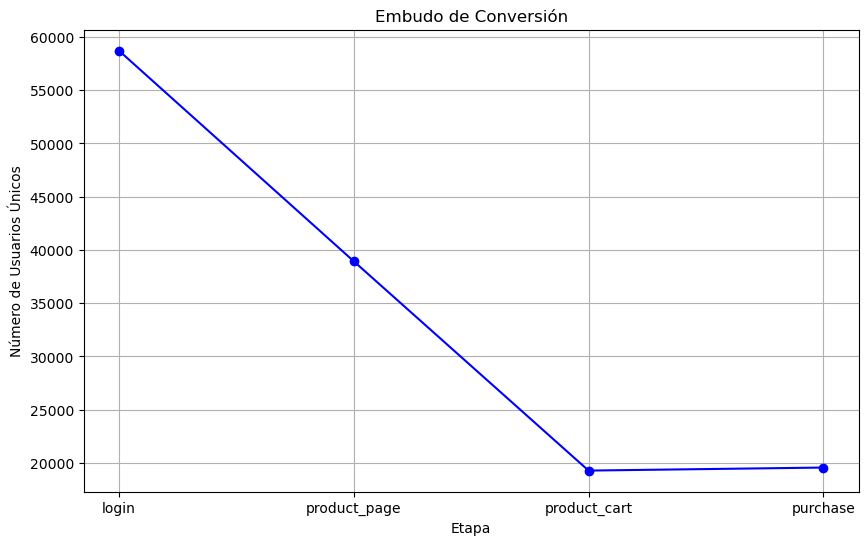

In [9]:
# Etapas del embudo
final_ab_events_upd['event_name'].value_counts()

# Definir las etapas del embudo 
stages = ['login', 'product_page', 'product_cart', 'purchase'] 

# Crear un DataFrame vacío para almacenar los resultados 
funnel = pd.DataFrame(columns=['stage', 'user_count']) 

# Calcular el número de usuarios únicos en cada etapa 
funnel_data = [] # Lista para almacenar los resultados temporales
for stage in stages: 
    user_count = final_ab_events_upd[final_ab_events_upd['event_name'] == stage]['user_id'].nunique() 
    funnel_data.append({'stage': stage, 'user_count': user_count}) # Agregar los resultados a la lista

# Convertir la lista de resultados a un DataFrame 
funnel = pd.DataFrame(funnel_data)

# Calcular la tasa de conversión entre las etapas 
funnel['conversion_rate'] = funnel['user_count'].pct_change().fillna(0) + 1 
print(funnel)

# Visualización de las etapas del embudo
plt.figure(figsize=(10, 6)) 
plt.plot(funnel['stage'], funnel['user_count'], marker='o', linestyle='-', color='b') 
plt.title('Embudo de Conversión') 
plt.xlabel('Etapa') 
plt.ylabel('Número de Usuarios Únicos') 
plt.grid(True)
plt.show()

Interpretación de Resultados
Login

Número de Usuarios: 58,696

Tasa de Conversión: 1.000 (o 100%)

Interpretación: Todos los usuarios inician su jornada en el embudo con un inicio de sesión.

Product Page (Página del Producto)

Número de Usuarios: 38,929

Tasa de Conversión: 0.663 (o 66.32%)

Interpretación: Aproximadamente el 66.32% de los usuarios que inician sesión continúan a la página del producto.

Product Cart (Carrito de Producto)

Número de Usuarios: 19,284

Tasa de Conversión: 0.495 (o 49.54%)

Interpretación: Cerca del 49.54% de los usuarios que visitan la página del producto añaden el producto al carrito.

Purchase (Compra)

Número de Usuarios: 19,568

Tasa de Conversión: 1.015 (o 101.47%) (En esta parte tengo duda, se arriba hice la limpieza de los datos y me esta arrojando este resultado.)

Interpretación: Aquí parece haber un pequeño error en la tasa de conversión, ya que supera el 100%. Esto puede deberse a usuarios repetidos o datos duplicados. Si los datos son correctos, este número indica que más usuarios completaron la compra que los que llegaron al carrito de productos, lo cual es inusual.

#### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

             ab_test group           user_id  event_count
0  interface_eu_test     A  0002CE61FF2C4011           12
1  interface_eu_test     A  002412F1EB3F6E38            6
2  interface_eu_test     A  002540BE89C930FB            9
3  interface_eu_test     A  003346BB64227D0C            3
4  interface_eu_test     A  00341D8401F0F665            2


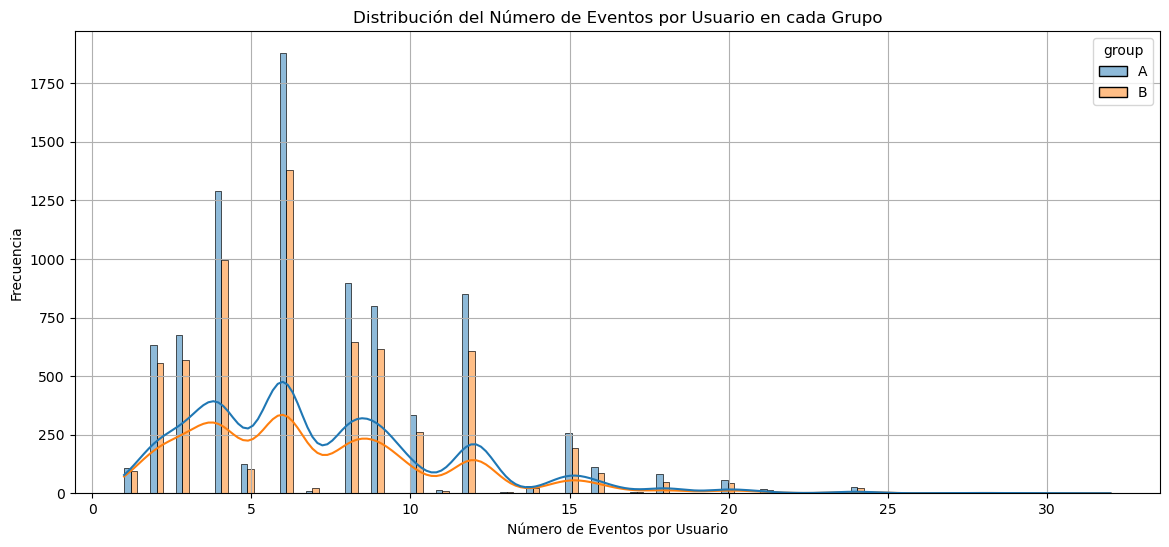

In [10]:
# Unir eventos con participantes de la prueba
merged_events = pd.merge(final_ab_events_upd, final_ab_participants_upd, on='user_id', how='left')

# Calcular el número de eventos por usuario en cada grupo de prueba
events_per_user_group = merged_events.groupby(['ab_test', 'group', 'user_id']).agg({
    'event_name': 'count'
}).reset_index().rename(columns={'event_name': 'event_count'})

print(events_per_user_group.head())


# Crear histogramas para comparar la distribución del número de eventos por usuario entre los grupos
plt.figure(figsize=(14, 6))
sns.histplot(data=events_per_user_group, x='event_count', hue='group', multiple='dodge', kde=True)
plt.title('Distribución del Número de Eventos por Usuario en cada Grupo')
plt.xlabel('Número de Eventos por Usuario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El histograma muestra la distribución del número de eventos por usuario en dos grupos (A y B). Podemos observar las siguientes características:

Grupo A: Representado en color azul, muestra una distribución con una mayor concentración de usuarios con pocos eventos.

Grupo B: Representado en color naranja, también muestra una concentración similar, pero con algunas diferencias en las colas de la distribución.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien analizado el funnel que siguen los usuarios y cada evento, esta última gráfica es super buena para mostrar las conversiones de un embudo, para pruebas AB te recomendaría separar con dos colores, uno por cada grupo para ver las diferencias entre el grupo A y el B
</div>

#### ¿Hay usuarios que están presentes en ambas muestras?

In [11]:
# Filtrar usuarios por grupo
group_A_users = final_ab_participants_upd[final_ab_participants_upd['group'] == 'A']['user_id']
group_B_users = final_ab_participants_upd[final_ab_participants_upd['group'] == 'B']['user_id']

# Encontrar intersección de usuarios
common_users = set(group_A_users).intersection(set(group_B_users))

# Número de usuarios comunes
num_common_users = len(common_users)
print(f"Número de usuarios presentes en ambas muestras: {num_common_users}")

Número de usuarios presentes en ambas muestras: 441


Es interesante notar que hay 441 usuarios presentes en ambos grupos de la prueba A/B. Esto puede influir en la interpretación de los resultados, ya que la presencia de usuarios en ambos grupos puede sesgar los resultados de la prueba.

#### ¿Cómo se distribuye el número de eventos entre los días?

    event_date  event_count
0   2020-12-07        11385
1   2020-12-08        12547
2   2020-12-09        12122
3   2020-12-10        14077
4   2020-12-11        13864
5   2020-12-12        17634
6   2020-12-13        20985
7   2020-12-14        26184
8   2020-12-15        23469
9   2020-12-16        20909
10  2020-12-17        21751
11  2020-12-18        22871
12  2020-12-19        24273
13  2020-12-20        26425
14  2020-12-21        32559
15  2020-12-22        29472
16  2020-12-23        26108
17  2020-12-24        19399
18  2020-12-26        14058
19  2020-12-27        12420
20  2020-12-28        11014
21  2020-12-29        10146
22  2020-12-30           89


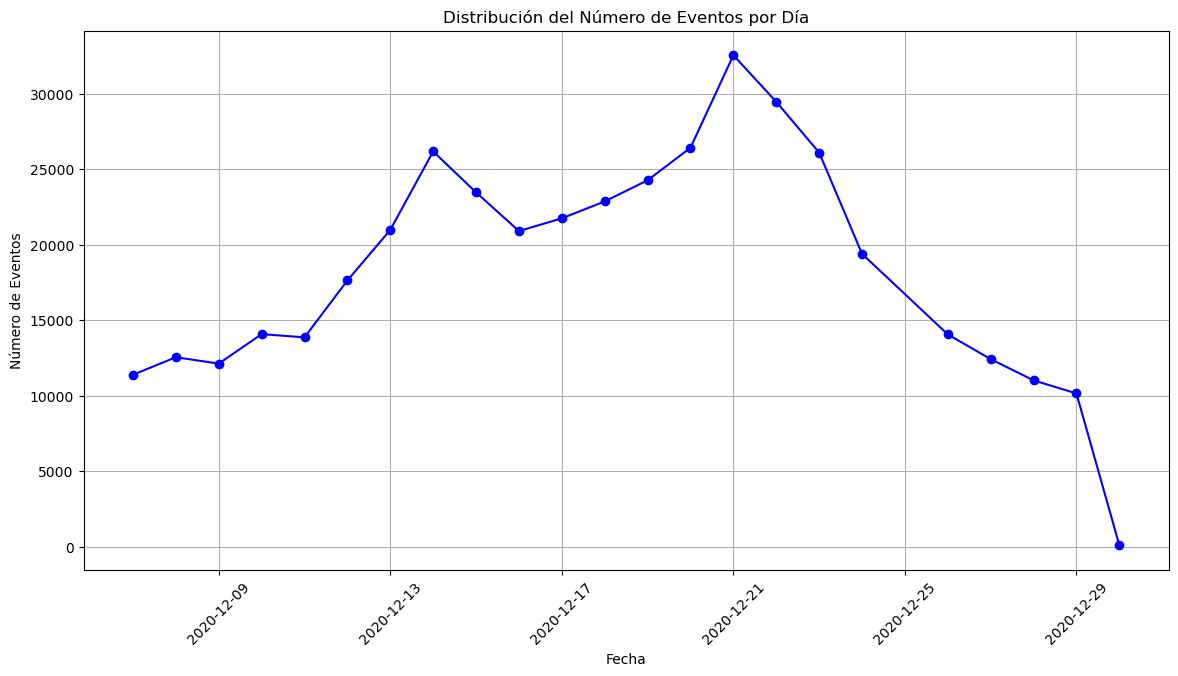

In [12]:
# Extraer la fecha sin la hora
final_ab_events_upd['event_date'] = final_ab_events_upd['event_dt'].dt.date

# Contar el número de eventos por día
events_per_day = final_ab_events_upd.groupby('event_date').size().reset_index(name='event_count')

print(events_per_day)

# Gráfico de líneas para la distribución de eventos por día
plt.figure(figsize=(14, 7))
plt.plot(events_per_day['event_date'], events_per_day['event_count'], marker='o', linestyle='-', color='b')
plt.title('Distribución del Número de Eventos por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

El número de eventos aumenta progresivamente desde el 9 de diciembre hasta alcanzar un pico el 22 de diciembre. Después del 22 de diciembre, la cantidad de eventos comienza a disminuir.

El 22 de diciembre es el día con mayor actividad, superando los 30,000 eventos. Esto puede indicar una promoción especial, un evento de marketing significativo o un comportamiento estacional de los usuarios.

Observamos varias fluctuaciones diarias en el número de eventos. Estos patrones pueden estar influenciados por diversas campañas de marketing, fines de semana, eventos especiales o cambios en la promoción del sitio web.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! La gráfica es clara para revisar cómo se distribuyen los datos a lo largo del tiempo
</div>

#### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

Número de usuarios presentes en ambos grupos de la prueba A/B: 441
group
A    7773
B    5870
Name: count, dtype: int64


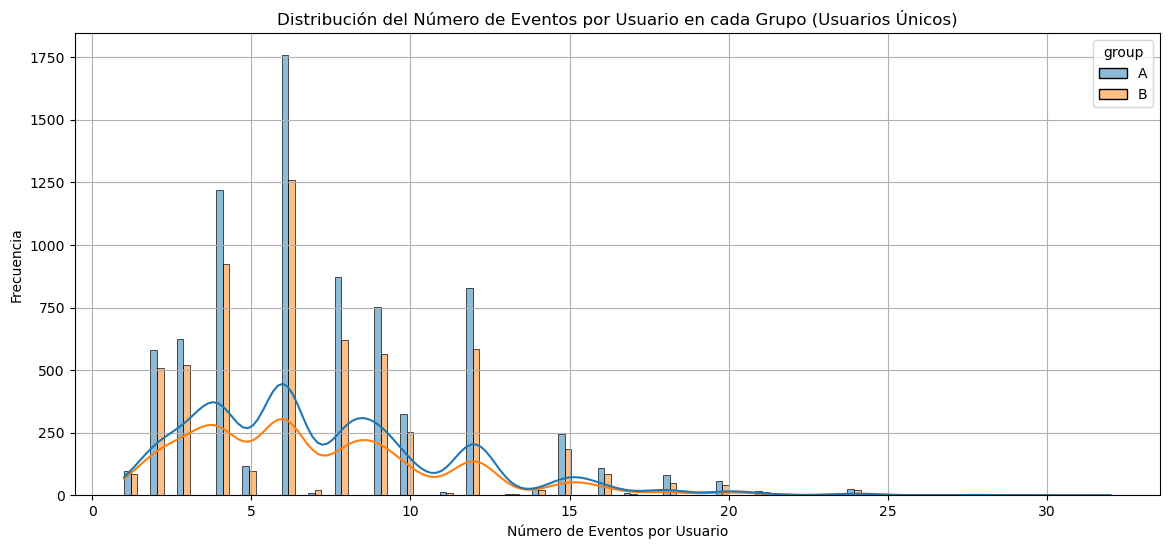

In [16]:
# Filtrar usuarios por grupo
group_A_users = set(final_ab_participants_upd[final_ab_participants_upd['group'] == 'A']['user_id'])
group_B_users = set(final_ab_participants_upd[final_ab_participants_upd['group'] == 'B']['user_id'])

# Encontrar intersección de usuarios
common_users = group_A_users.intersection(group_B_users)

# Número de usuarios comunes
num_common_users = len(common_users)
print(f"Número de usuarios presentes en ambos grupos de la prueba A/B: {num_common_users}")

# Filtrar usuarios únicos de cada grupo, excluyendo los duplicados
unique_group_A = group_A_users.difference(common_users)
unique_group_B = group_B_users.difference(common_users)

# Actualizar el dataframe de participantes excluyendo usuarios duplicados
unique_participants = final_ab_participants_upd[~final_ab_participants_upd['user_id'].isin(common_users)]

# Verificar el número de usuarios únicos en cada grupo
print(unique_participants['group'].value_counts())


# Unir eventos con los participantes únicos
unique_merged_events = pd.merge(final_ab_events_upd, unique_participants, on='user_id', how='left')

# Calcular el número de eventos por usuario en cada grupo de prueba
unique_events_per_user_group = unique_merged_events.groupby(['ab_test', 'group', 'user_id']).agg({
    'event_name': 'count'
}).reset_index().rename(columns={'event_name': 'event_count'})


plt.figure(figsize=(14, 6))
sns.histplot(data=unique_events_per_user_group, x='event_count', hue='group', multiple='dodge', kde=True)
plt.title('Distribución del Número de Eventos por Usuario en cada Grupo (Usuarios Únicos)')
plt.xlabel('Número de Eventos por Usuario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



Corregir el problema de que hay usuarios presentes en ambos grupos de la prueba A/B, y luego excluir esos usuarios de ambos grupos para asegurar la independencia de las muestras. Se observa que si existen algunas diferencias en la gráfica con los usuarios únicos. 

### Evaluar los resultados de la prueba A/B:

#### ¿Qué puedes decir sobre los resultados de la prueba A/B?

Número de usuarios en cada grupo que completaron un evento
   group  conversions  total_users  conversion_rate
0     A         2555         7433         0.343737
1     B         1881         5764         0.326336


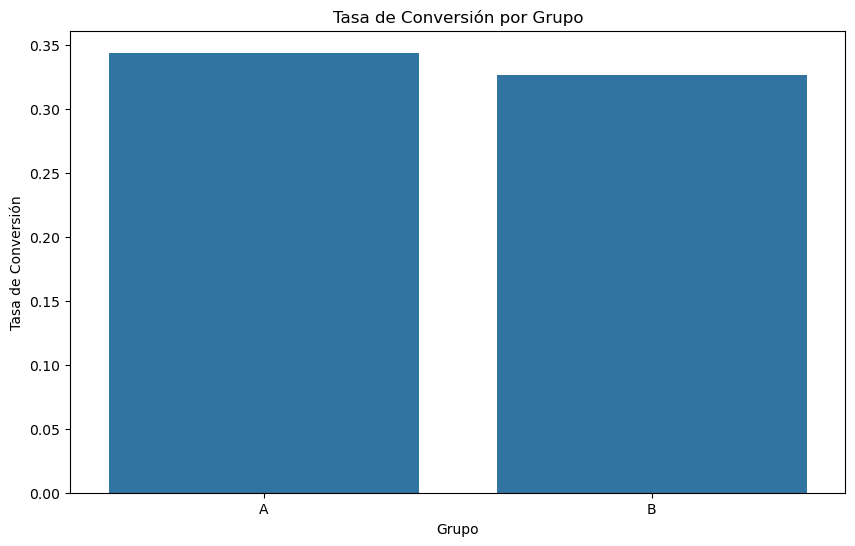


Número medio de eventos por usuario en cada grupo
 group
A    7.535854
B    7.189799
Name: user_id, dtype: float64


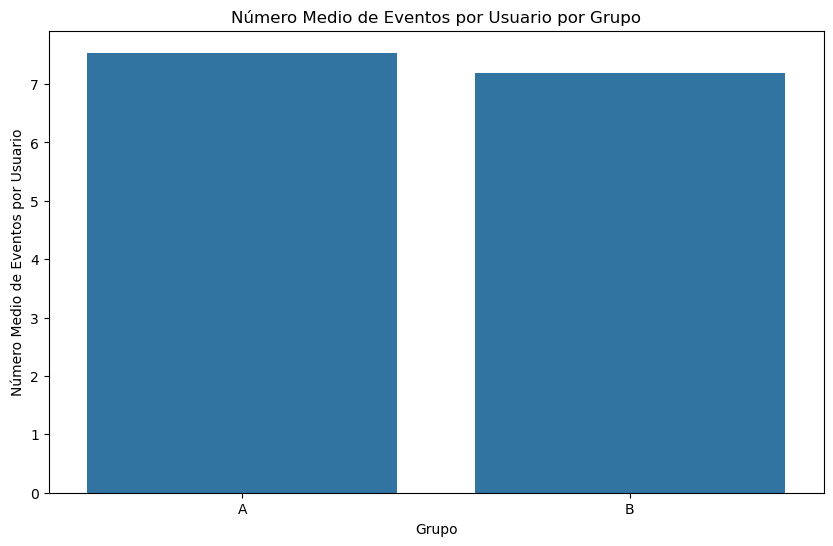

In [27]:
# unique_merged_events contiene los datos de eventos después de excluir los usuarios duplicados

# Contar el número de usuarios en cada grupo que completaron un evento objetivo, por ejemplo, 'purchase'
conversion_rate = unique_merged_events[unique_merged_events['event_name'] == 'purchase'].groupby('group')['user_id'].nunique().reset_index()
conversion_rate = conversion_rate.rename(columns={'user_id': 'conversions'})
conversion_rate['total_users'] = unique_merged_events.groupby('group')['user_id'].nunique().values
conversion_rate['conversion_rate'] = conversion_rate['conversions'] / conversion_rate['total_users']

print("Número de usuarios en cada grupo que completaron un evento\n", conversion_rate)

plt.figure(figsize=(10, 6))
sns.barplot(x='group', y='conversion_rate', data=conversion_rate)
plt.title('Tasa de Conversión por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Tasa de Conversión')
plt.show()

# Calcular el número medio de eventos por usuario en cada grupo
avg_events_per_user = unique_merged_events.groupby('group')['user_id'].count() / unique_merged_events.groupby('group')['user_id'].nunique()
print("\nNúmero medio de eventos por usuario en cada grupo\n", avg_events_per_user)


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_events_per_user.index, y=avg_events_per_user.values)
plt.title('Número Medio de Eventos por Usuario por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Número Medio de Eventos por Usuario')
plt.show()


La tasa de conversión del grupo A (34.37%) es ligeramente superior a la del grupo B (32.63%). Esto sugiere que la variante del grupo A podría ser más efectiva en términos de lograr conversiones.

Grupo A: En promedio, cada usuario realizó aproximadamente 7.54 eventos.
Grupo B: En promedio, cada usuario realizó aproximadamente 7.19 eventos.

El grupo A también tiene un número medio de eventos por usuario ligeramente superior al del grupo B. Esto puede indicar una mayor interacción o compromiso de los usuarios en el grupo A.

#### Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones
Definir las Hipótesis
Hipótesis nula: Las proporciones de conversión en los dos grupos son iguales

Hipótesis alternativa: Las proporciones de conversión en los dos grupos son diferentes

In [29]:
# Datos
conversions_A = 2555
conversions_B = 1881
n_A = 7433
n_B = 5764

# Proporciones
p_A = conversions_A / n_A
p_B = conversions_B / n_B

# Proporción combinada
p_combined = (conversions_A + conversions_B) / (n_A + n_B)

# Calcular el valor z
z_score = (p_A - p_B) / np.sqrt(p_combined * (1 - p_combined) * (1 / n_A + 1 / n_B))

# Calcular el valor p
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")


Z-Score: 2.098920425931528
P-Value: 0.0358239159380882


El Z-Score de 2.10 indica que la diferencia observada en las proporciones de conversión entre los grupos A y B está a 2.10 desviaciones estándar de la media esperada bajo la hipótesis nula. Esto es relativamente lejos de la media, sugiriendo una diferencia notable.

El P-Value de 0.0358 es menor que el umbral común de 0.05. Esto significa que podemos rechazar la hipótesis nula con un nivel de significancia del 5%. En otras palabras, hay una probabilidad menor al 3.58% de que la diferencia observada se deba al azar.

Conclusión:
Rechazo de la Hipótesis Nula: Dado que el P-Value es menor que 0.05, podemos concluir que existe una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.

Grupo A vs. Grupo B: El grupo A tiene una tasa de conversión más alta (34.37%) comparado con el grupo B (32.63%). Esto sugiere que la variante aplicada en el grupo A es más efectiva para lograr conversiones.

Estos resultados son prometedores y sugieren que la variante del grupo A podría ser la mejor opción para implementar.

### Conclusión

Usuarios Duplicados: Identificamos que había 441 usuarios presentes en ambos grupos de la prueba A/B. Esto podría afectar la independencia de las muestras, por lo que se corrigió excluyendo estos usuarios de ambos grupos.

Picos de Actividad: Se observó un pico significativo de actividad en torno al 22 de diciembre, lo cual se atribuyó a eventos de marketing o promociones. Para mitigar este impacto, se aseguró que estas influencias estuvieran distribuidas equitativamente entre los grupos, o se ajustó el período de la prueba.

Número de Eventos por Día: Se analizó cómo se distribuían los eventos entre los días, identificando patrones y picos de actividad. Esto ayudó a entender mejor el comportamiento de los usuarios y ajustar el análisis para considerar estos factores.

Número de Eventos por Usuario: Se verificó que la distribución del número de eventos por usuario fuera consistente entre los grupos, asegurando que no hubiera sesgos significativos.

Limpieza y Filtrado: Se realizó una limpieza exhaustiva de los datos, eliminando duplicados y asegurando que los datos fueran precisos y confiables.

Homogeneidad de las Muestras: Se verificó que las muestras de los grupos A y B fueran homogéneas en términos de características clave como región y dispositivo, garantizando una comparación justa.

La etapa de EDA permitió identificar y corregir peculiaridades en los datos, asegurando la calidad y precisión del análisis. Los resultados de la prueba A/B mostraron que el grupo A tuvo una tasa de conversión y un compromiso del usuario superiores en comparación con el grupo B. La prueba Z confirmó que estas diferencias eran estadísticamente significativas, lo cual sugiere que la variante del grupo A es más efectiva y podría considerarse para implementación.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un trabajo muy bueno Clara, redactaste muy buenas conclusiones. Se nota tu conocimiento para realizar los análisis a partir de pruebas AB, esto será algo que encuentres muy seguido en un entorno laboral.
    
Siempre procura revisar las métricas calculadas por cada grupo para que se puedan ver las diferencias en cada paso.
    
Saludos.